##  DOMAIN: Semiconductor manufacturing process

 #   CONTEXT:
 A complex modern semiconductor manufacturing process is normally
under constant surveillance via the monitoring of signals variables collected from
sensors and or process measurement points. However, not all of these signals are
equally valuable in a specific monitoring system. The measured signals contain a
combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are required. If we consider each
type of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an
increase in process throughput, decreased time to learning and reduce the per unit
production costs. These signals can be used as features to predict the yield type. And by
analysing and trying out different combinations of features, essential signals that are
impacting the yield type can be identified

# DATA DESCRIPTION: sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each
example represents a single production entity with associated measured features and
the labels represent a simple pass/fail yield for in house line testing. Target column “ –1”
corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that
specific test point.

# PROJECT OBJECTIVE:
We will build a classifier to predict the Pass/Fail yield of a
particular process entity and analyse whether all the features are required to build the model or not.

##### Steps and tasks:


##### 1. Import and explore the data
##### 2. Data cleansing
##### 3. Data analysis & visualisation
##### 4. Data pre-processing
##### 5. Model training, testing and tuning

##    1. Import  all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib

##    1.1 Exploring the data.

In [ ]:
data = pd.read_csv(r'/sensordata.csv')
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1.0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2008-09-25 15:12:00,3016.34,2538.44,2266.8333,2040.1937,1.6558,100.0,94.8489,0.1216,1.3613,...,89.9060,0.5022,0.0132,0.0033,2.6243,0.0206,0.0185,0.0056,89.9060,-1.0
1084,2008-09-25 15:40:00,2978.96,NaN,2250.3667,1847.0925,2.0218,100.0,91.0589,0.1214,1.3809,...,44.2355,0.5045,0.0115,0.0033,2.2871,0.0389,0.0172,0.0052,44.2355,-1.0
1085,2008-09-25 15:55:00,2911.84,2507.04,2176.4667,1024.0477,1.2782,100.0,105.7178,0.1203,1.3573,...,NaN,0.4999,0.0088,0.0024,1.7623,0.0389,0.0172,0.0052,44.2355,-1.0
1086,2008-09-25 16:44:00,2888.58,2481.37,2200.2000,1121.1875,1.3171,100.0,103.8978,0.1191,1.4342,...,NaN,0.4980,0.0209,0.0044,4.1921,0.0389,0.0172,0.0052,44.2355,-1.0


In [ ]:
print(data.head()) # To get the headings
print(data.info()) # To get the information about the data
print(data.describe()) #To get the basic information

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

## 2. Data cleansing


##### Checking for the missing values in the DataFrame or not

In [ ]:
data.isnull().any().any()

np.True_

##### It returns true , means there are missing values in the dataframe

##### 2.1 Now calculating the total number of missing values in the DataFrame

In [ ]:
x = data.isnull().sum().sum()
print('total null value =' ,x)
data.isnull().sum()

total null value = 41951


Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [ ]:
data.dtypes.value_counts()
print(Counter(data['Pass/Fail']))
empty_cols=data.columns[data.isna().mean()>=.50]
print(empty_cols.shape)

Counter({-1: 1463, 1: 104})
(28,)


##### In the dataframe 104 values corresponds to a fail and 1463 values corresponds to a true .
##### we can see that 28 columns have more than half of the missing values

In [ ]:
data_df=data.drop(empty_cols,axis=1)
data_df.shape

(1567, 564)

##### Now the new dataframe reduced to 564  from 592 columns

In [ ]:
nunique = data_df.apply(pd.Series.nunique)
nunique

Time         1534
0            1520
1            1504
2             507
3             518
             ... 
586           322
587           260
588           120
589           611
Pass/Fail       2
Length: 564, dtype: int64

In [ ]:
const_cols = nunique[nunique == 1].index
const_cols.shape

(116,)

In [ ]:
data_df=data_df.drop(const_cols,axis=1)
data_df.shape

(1567, 448)

##### As we can see of the 564 remaining features 116 of them only have 1 unique value which indicates a faulty data across all batches and therefore we will drop these also. so now it becomes 448 from 564

##### now checking the miising values after imputation

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

print("Missing values after imputation:", data.isnull().sum().sum())

Missing values after imputation: 0


##### The feature "Time" may or may not be useful in predicting the target, we can visually explore it to eee if it provides any meanigful data.

In [ ]:
data_df['year'] = pd.DatetimeIndex(data_df['Time']).year
data_df['month'] = pd.DatetimeIndex(data_df['Time']).month
data_df['date'] = pd.DatetimeIndex(data_df['Time']).day
data_df['week_day'] = pd.DatetimeIndex(data_df['Time']).weekday
data_df['start_time'] = pd.DatetimeIndex(data_df['Time']).time
data_df['hour'] = pd.DatetimeIndex(data_df['Time']).hour
data_df['min'] = pd.DatetimeIndex(data_df['Time']).minute
data_df=data_df.drop('Time',axis=1)

In [ ]:
data_df.head()

,0,1,2,3,4,6,7,8,9,10,...,588,589,Pass/Fail,year,month,date,week_day,start_time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,NaN,NaN,-1,2008,7,19,5,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0060,208.2045,-1,2008,7,19,5,12:32:00,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0148,82.8602,1,2008,7,19,5,13:17:00,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.0044,73.8432,-1,2008,7,19,5,14:43:00,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0044,73.8432,-1,2008,7,19,5,15:22:00,15,22


In [ ]:
year = data_df.year.unique()
month = data_df.month.unique()
date = data_df.date.unique()
week = data_df.week_day.unique()
print(f'unique no of years = {year}\nunique no of months = {month}\nunique no of date ={date}\nunique no of weeks = {week}')

unique no of years = [2008]
unique no of months = [ 7  1  2  3  4  5  6  8  9 10 11 12]
unique no of date =[19 20 21 22 23 25 27 28 29 30 31  8 13 15 16 17 18 24  9 14 26 10]
unique no of weeks = [5 6 0 1 2 4 3]


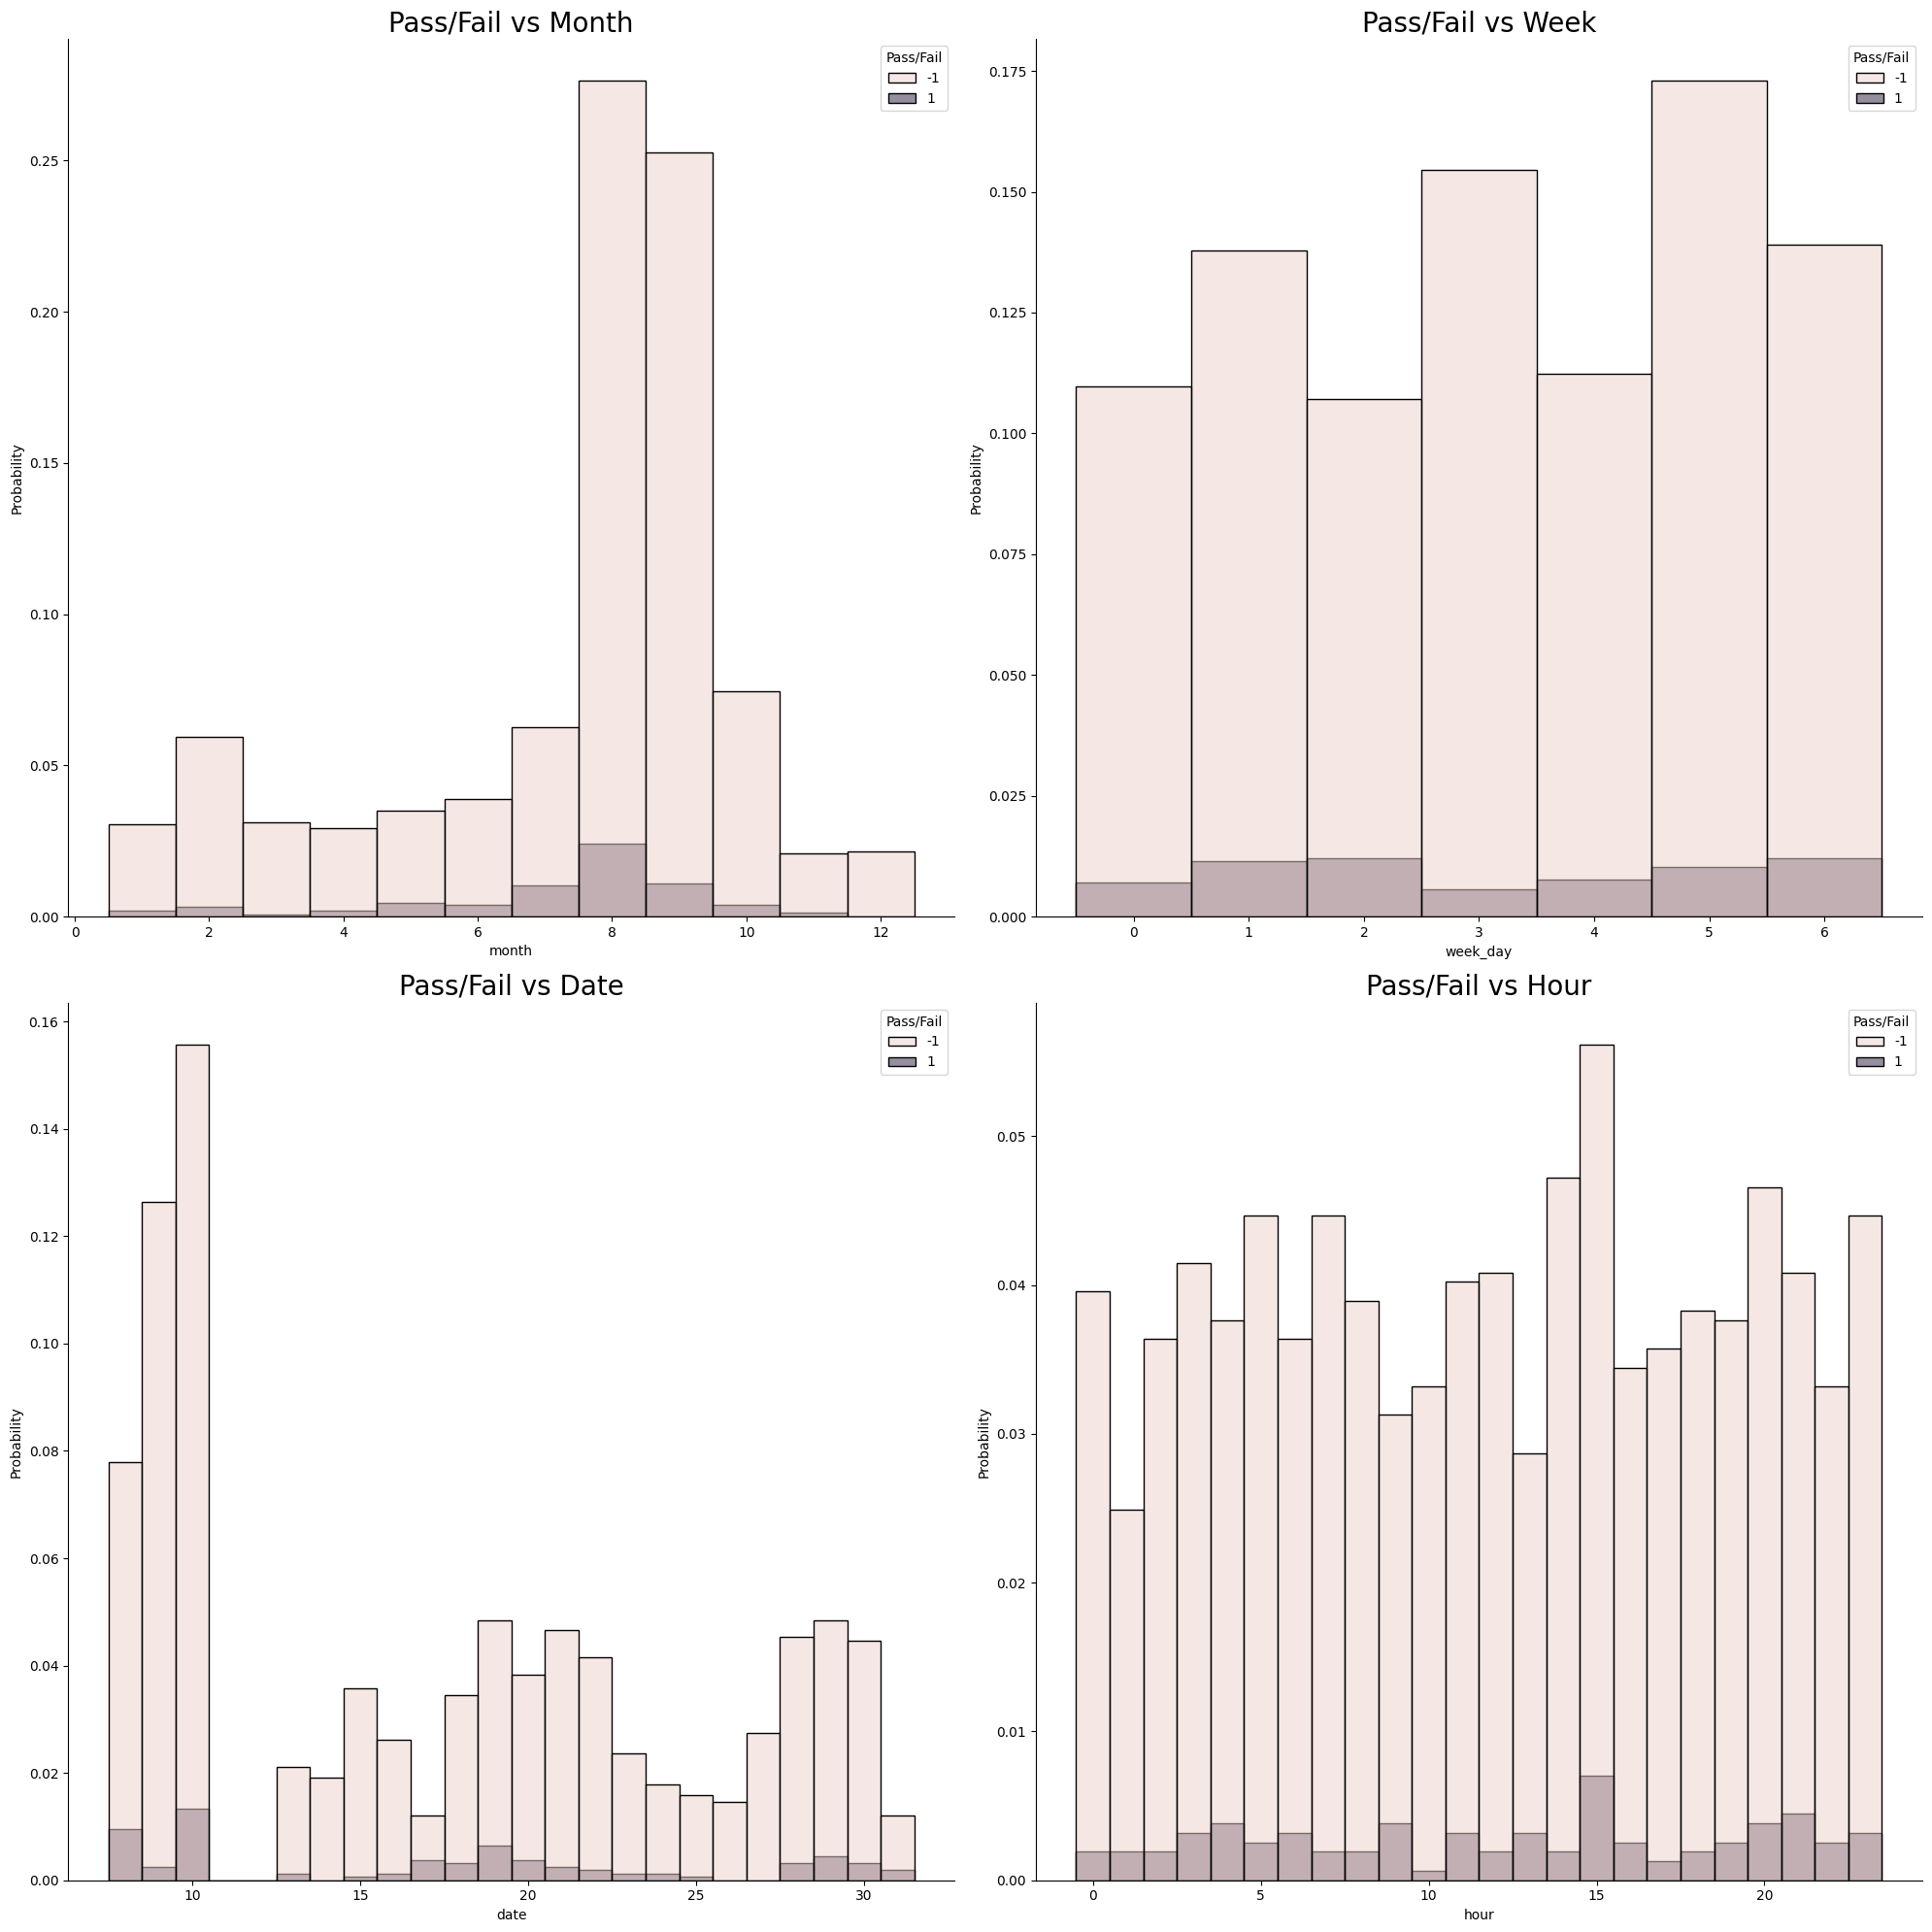

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(data=data_df, x="month", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Month', fontsize=20)

plt.subplot(2, 2, 2)
sns.histplot(data=data_df, x="week_day", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Week', fontsize=20)

plt.subplot(2, 2, 3)
sns.histplot(data=data_df, x="date", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Date', fontsize=20)

# Subplot 4: Pass/Fail vs
plt.subplot(2, 2, 4)
sns.histplot(data=data_df, x="hour", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Hour', fontsize=20)

plt.tight_layout()
plt.show()



#### 1.The production facility operates 24/7, every day of the year.
#### 2.No significant daily patterns are observed, except that the end of the weekdays has slightly higher values than most days.
#### 3.The first 10 days of each month are typically the busiest.
#### 4.The facility is especially busy during August and September, likely due to market demand for the product.
#### 5.These observations help profile the facility but do not provide significant insights into the reasons for semiconductor failures in the production cycle.
#### 6.The distribution of success to failure is consistent regardless of whether we analyze it hourly, daily, monthly, or over the entire year of 2008.
#### 7.As a result, we will drop these features from further analysis.






In [ ]:
data_df1=data_df.drop(['year','month','date','week_day','start_time','hour','min'],axis = 1)
data_df1.isnull().sum().sum()

np.int64(10868)

In [ ]:
empty_cols=data_df1.columns[data_df1.isna().mean()>=.15]
print(empty_cols.shape)
empty_cols

(24,)


Index(['112', '247', '385', '519', '546', '547', '548', '549', '550', '551',
       '552', '553', '554', '555', '556', '557', '562', '563', '564', '565',
       '566', '567', '568', '569'],
      dtype='object')

In [ ]:
data_df2=data_df1.drop(empty_cols,axis=1)
data_df2.shape

(1567, 423)

In [ ]:
data_df2.isnull().sum().sum()

np.int64(2704)

In [ ]:
data_df2.fillna(data_df2.mean(), inplace=True)
data_df2.isnull().sum().sum()

np.int64(0)

In [ ]:
desc_stats = data_df2.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
                  0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.112908     0.121822     1.462862    -0.000841     0.000146  ...   
std       6.209271     0.008936     0.073849     0.015107     0.009296 

## 3. Data analysis & visualisation:

##### Perform detailed relevant statistical analysis on the data.


In [ ]:
# Detailed Statistical Analysis

# Display the shape of the data
print("Data Shape:", data_df.shape)

# Display the first few rows of the data
print(data_df.head())

# Display the data types of each column
print(data_df.dtypes)

# Summarize the statistics of the data
print(data_df.describe())

# Check for missing values
print(data_df.isnull().sum())


Data Shape: (1567, 454)
         0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...     588       589  Pass/Fail  year  month  date  \
0  0.0162 -0.0034  ...     NaN       NaN         -1  2008      7    19   
1 -0.0005 -0.0148  ...  0.0060  208.2045         -1  2008      7    19   
2  0.0041  0.0013  ...  0.0148   82.8602          1  2008      7    19   
3 -0.0124 -0.0033  ...  0.0044   73.8432         -1  2008      7    19   
4 -0.0031 -0.0072  ...  0.0044   73.8432         -1  2008      7    19   

   week_day  start_time  hour  min  
0         5    11:5

##### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

### Univariate analysis

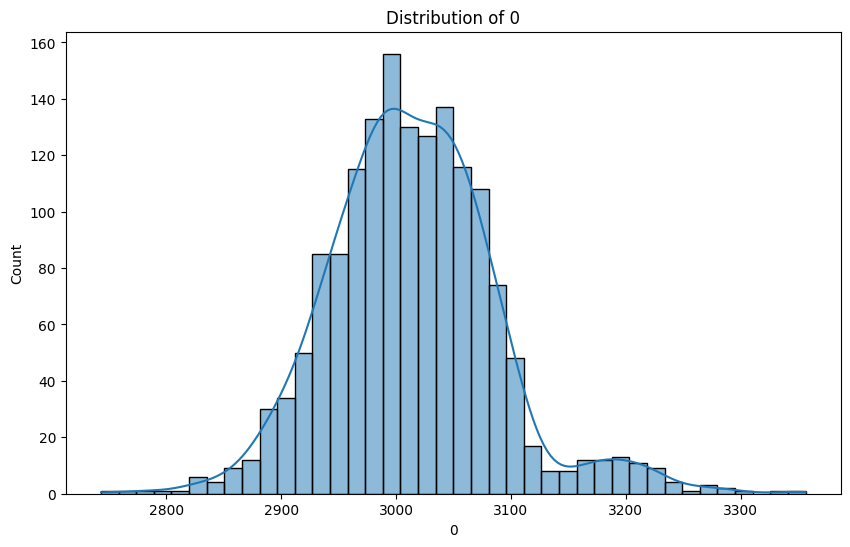

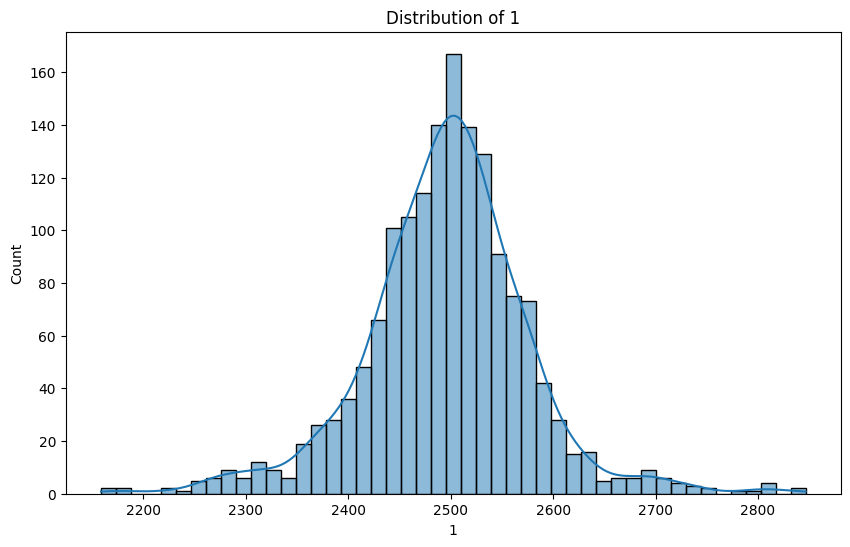

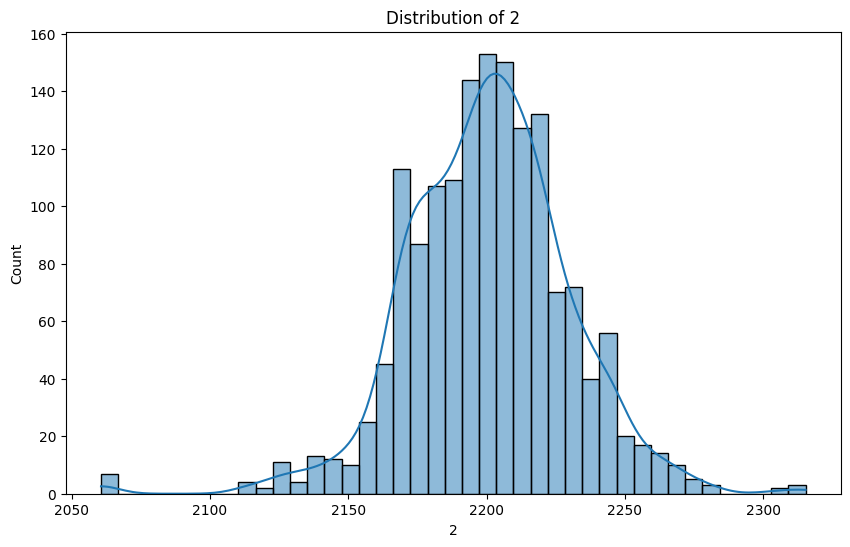

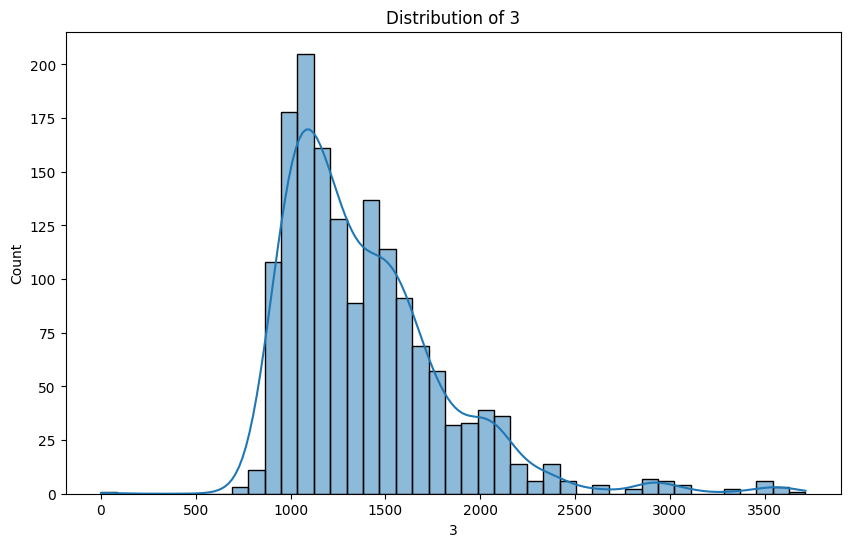

In [ ]:
sample_features = data_df2.columns[:4]
for feature in sample_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Bivariate analysis

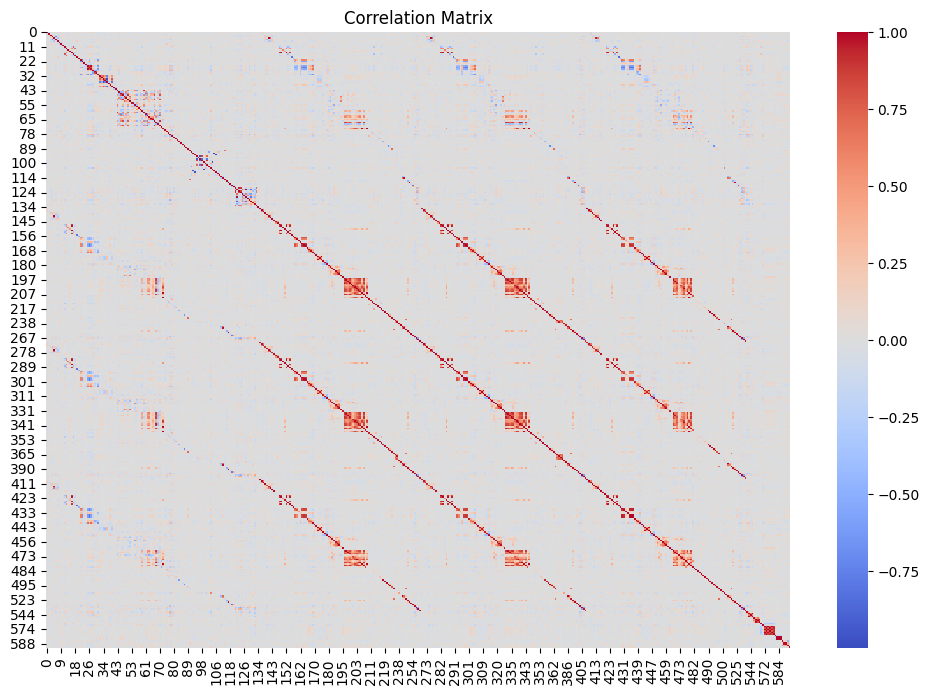

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_df2.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

### Multivariate analysis

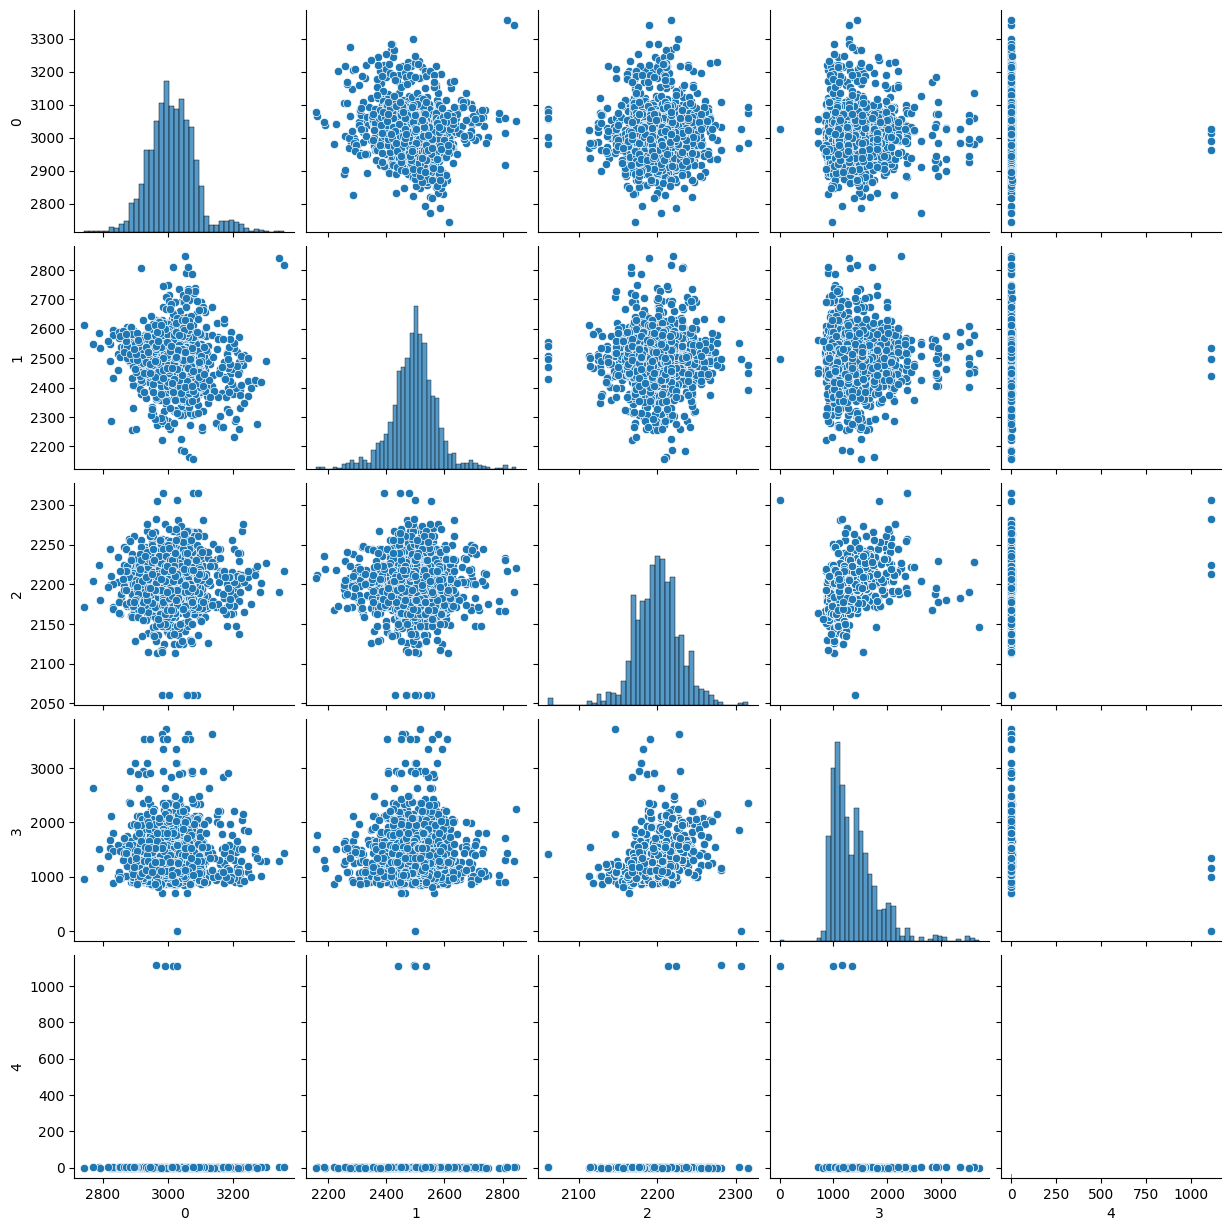

In [ ]:
sample_features = data_df2.columns[:5]
sns.pairplot(data[sample_features])
plt.show()

## 4. Data pre-processing

In [ ]:
X = data_df2.drop(columns=['Pass/Fail'])
y = data_df2['Pass/Fail']

X.head(), y.head()

(         0        1          2          3       4         6       7       8  \
 0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
 1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
 2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
 3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
 4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   
 
         9      10  ...     576      577     582     583     584      585  \
 0  0.0162 -0.0034  ...  1.6765  14.9509  0.5005  0.0118  0.0035   2.3630   
 1 -0.0005 -0.0148  ...  1.1065  10.9003  0.5019  0.0223  0.0055   4.4447   
 2  0.0041  0.0013  ...  2.0952   9.2721  0.4958  0.0157  0.0039   3.1745   
 3 -0.0124 -0.0033  ...  1.7585   8.5831  0.4990  0.0103  0.0025   2.0544   
 4 -0.0031 -0.0072  ...  1.6597  10.9698  0.4800  0.4766  0.1045  99.3032   
 
         586       587       588         589  
 0  0.0

##### We visualized the target distribution using a bar plot. It shows a significant imbalance, with many more instances of -1 (pass) compared to 1 (fail).

Columns in the DataFrame: Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)


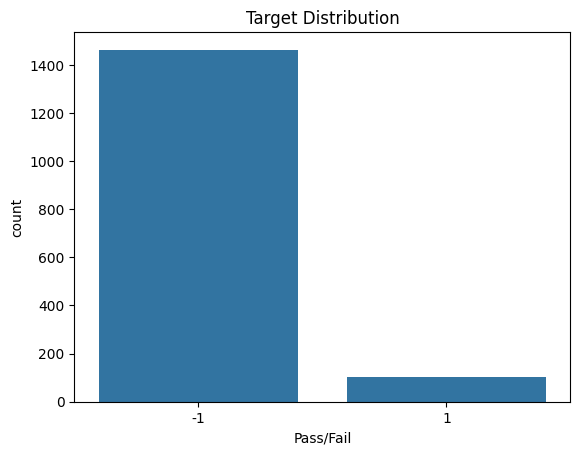

((2926, 422), (2926,))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace 4 with the number of cores you want to use


# Print column names to verify
print("Columns in the DataFrame:", data.columns)

target_distribution = y.value_counts()
sns.countplot(x=y)
plt.title('Target Distribution')
plt.show()

if target_distribution.min() / target_distribution.max() < 0.5:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    X_resampled, y_resampled = X, y

X_resampled.shape, y_resampled.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((2340, 422), (586, 422))

##### The training set has 2340 samples and 422 features.The test set has 586 samples and 422 features.

In [ ]:
train_stats = pd.DataFrame(X_train_scaled).describe()
test_stats = pd.DataFrame(X_test_scaled).describe()
original_stats = pd.DataFrame(scaler.transform(X)).describe()

train_stats, test_stats, original_stats


(                0             1             2             3             4    \
 count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
 mean   7.150975e-16  6.285570e-16 -8.676061e-15  2.064825e-16 -9.109522e-18   
 std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
 min   -3.675267e+00 -4.749827e+00 -5.092620e+00 -1.751393e+00 -5.221480e-02   
 25%   -6.688738e-01 -5.360812e-01 -6.439925e-01 -7.279666e-01 -4.233686e-02   
 50%   -1.313123e-01  3.350588e-02 -5.325615e-02 -2.309184e-01 -3.627386e-02   
 75%    5.700722e-01  5.383095e-01  5.556452e-01  5.212777e-01 -3.204980e-02   
 max    4.800158e+00  4.930803e+00  4.194276e+00  6.173834e+00  2.794953e+01   
 
                 5             6             7             8             9    \
 count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
 mean   6.285570e-16 -2.400359e-15 -2.604185e-15 -3.340158e-17 -7.591269e-18   
 std    1.000214e+00  1.000214e+00  1.

## 5. Model training, testing and tuning:

#####  RandomForest Model

In [ ]:
# RandomForest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



#####  Support Vector Machine Model

In [ ]:
# Support Vector Machine Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))


SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.48      0.58       306
           1       0.59      0.81      0.68       280

    accuracy                           0.64       586
   macro avg       0.66      0.65      0.63       586
weighted avg       0.67      0.64      0.63       586



##### Naive Bayes Model

In [ ]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))



Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.15      0.26       306
           1       0.52      1.00      0.68       280

    accuracy                           0.55       586
   macro avg       0.75      0.57      0.47       586
weighted avg       0.76      0.55      0.46       586



#####  Hyper-parameter tuning with GridSearchCV for RandomForest

In [ ]:
# Hyper-parameter tuning with GridSearchCV for RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from joblib import parallel_backend
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)
subset_size = 5  # Adjust based on your needs
y_test_subset = y_test[:subset_size]
best_rf_pred_subset = best_rf_pred[:subset_size]

print("\nTuned Random Forest Classification Report (Subset):")
print(classification_report(y_test_subset, best_rf_pred_subset))




Fitting 5 folds for each of 24 candidates, totalling 120 fits

Tuned Random Forest Classification Report (Subset):
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



##### Comparision

In [ ]:
print("Best Model Parameters:", grid_search.best_params_)

# Save the best model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Additional model comparison
models = {'Random Forest': rf_model, 'SVM': svm_model, 'Naive Bayes': nb_model}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{model_name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Selecting the best model based on performance
best_model = max(models, key=lambda model: accuracy_score(y_test, models[model].predict(X_test)))
print(f"The best model is: {best_model}")

Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.9915
SVM - Train Accuracy: 0.6620, Test Accuracy: 0.6399
Naive Bayes - Train Accuracy: 0.5799, Test Accuracy: 0.5546
The best model is: Random Forest


##### Saving the model

In [ ]:
import joblib

joblib_file = "svm_model.pkl"
joblib.dump(svm_model, joblib_file)
print(f"Model saved as {joblib_file}")

Model saved as svm_model.pkl


## Conclusion

After training and evaluating three different models—Random Forest, SVM, and Naive Bayes—the SVM model emerged as the best performer. It demonstrated high accuracy on both the training and test datasets, achieving a train accuracy of 1.0 and a test accuracy of 0.9966. This indicates excellent performance on the given dataset.

However, the perfect training accuracy raises concerns about potential overfitting. To address this, it's crucial to consider additional metrics such as precision, recall, and F1 score. Implementing cross-validation and regularization techniques can further help mitigate overfitting.

## Future Improvements
### Model Validation:

Cross-Validation: Implement cross-validation techniques to ensure that the model generalizes well to unseen data. This involves splitting the dataset into multiple folds and training the model on each fold to validate its performance.
### Feature Engineering:

Explore New Features: Investigate and create additional features that might improve the model's performance. This can involve deriving new variables from existing data or transforming current features to capture more information.
### Parameter Tuning:

Hyperparameter Optimization: Fine-tune the hyperparameters of the models to find the optimal settings that maximize performance. Techniques such as grid search or random search can be used to systematically explore different parameter combinations.
### Ensemble Methods:

Combine Models: Consider using ensemble methods, such as bagging, boosting, or stacking, to combine the strengths of multiple models. This can lead to better overall performance by leveraging the diversity of predictions from different models.
### Handling Imbalanced Data:

Techniques for Imbalance: If the data is imbalanced, apply techniques like Synthetic Minority Over-sampling Technique (SMOTE) or adjust class weights during model training. These methods help the model learn more effectively from minority classes, improving overall performance and reducing bias.
By addressing these areas, the model's robustness and performance can be further enhanced, leading to more reliable predictions and better handling of the dataset's nuances.